# About the data:
- this data sets consist of three types of wheat, what I am gonna do is assume which wheat belongs to each wheat kernel (type) and then compare my predictions to the real results to see how accurate the predictions were.
- the data is from: https://archive.ics.uci.edu/dataset/236/seeds 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cols= ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove', 'class']
df = pd.read_csv(r'Datasets\seeds_dataset.txt', sep='\\s+', names=cols)

In [6]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


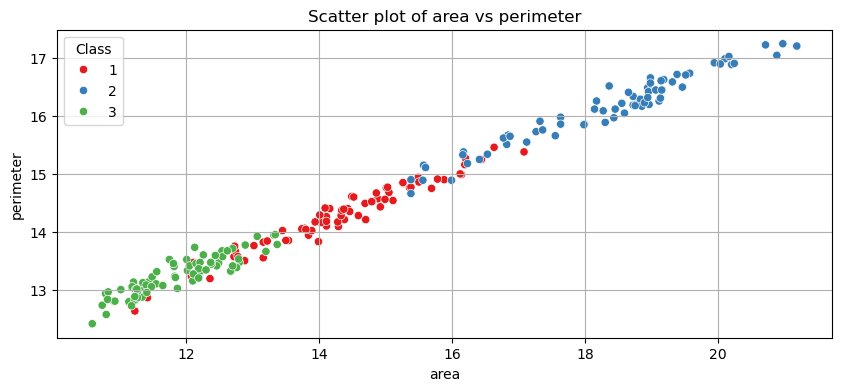

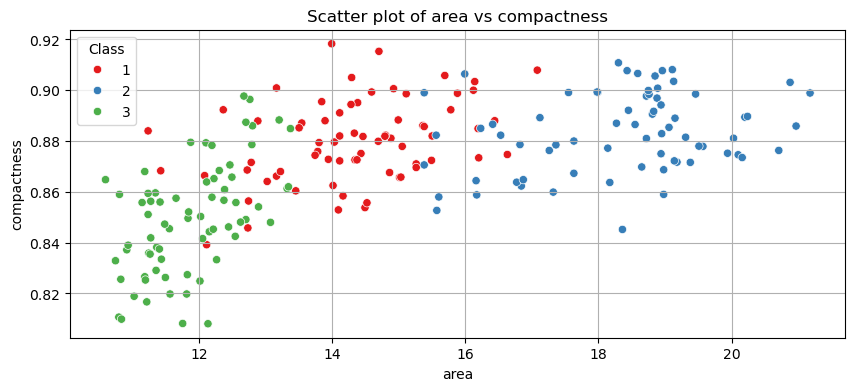

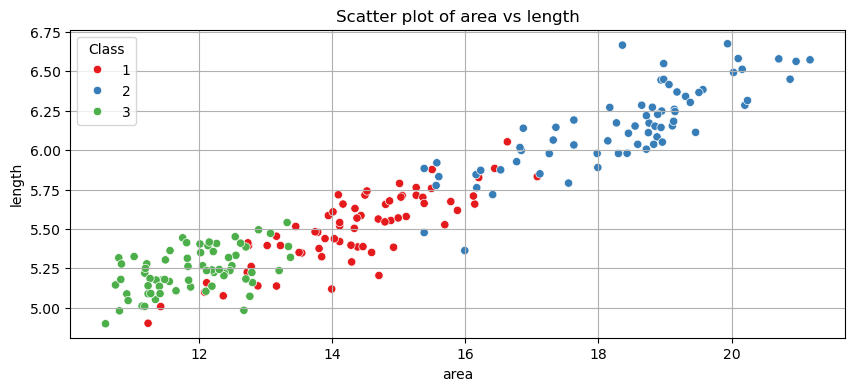

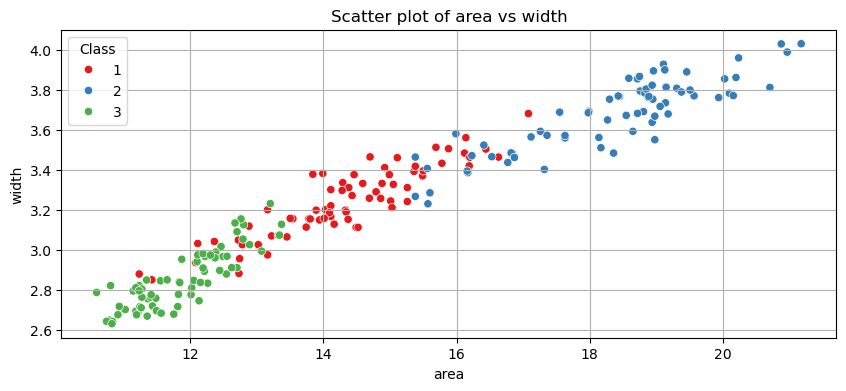

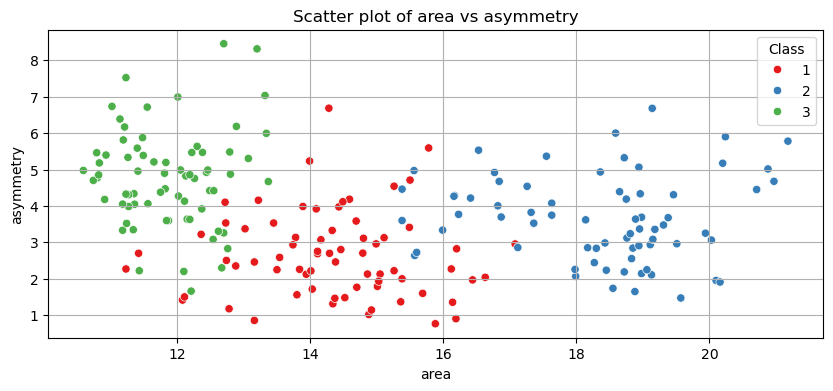

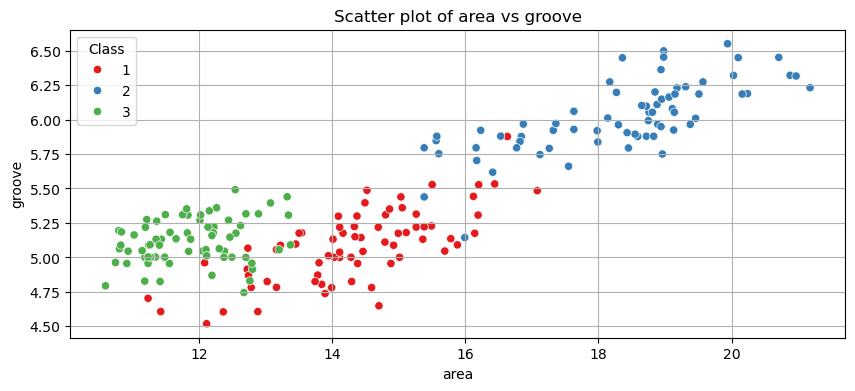

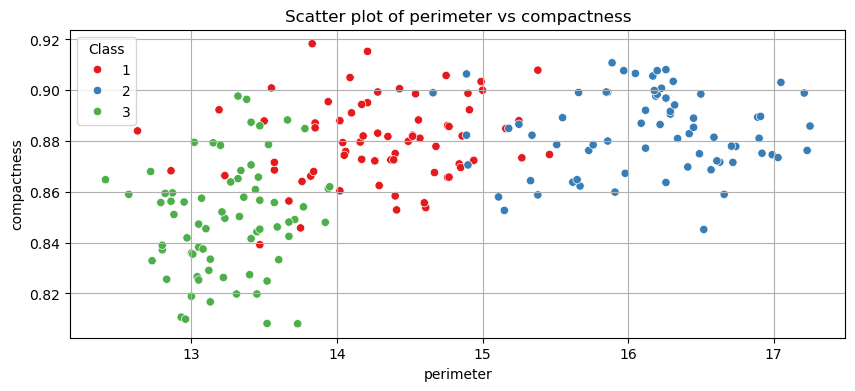

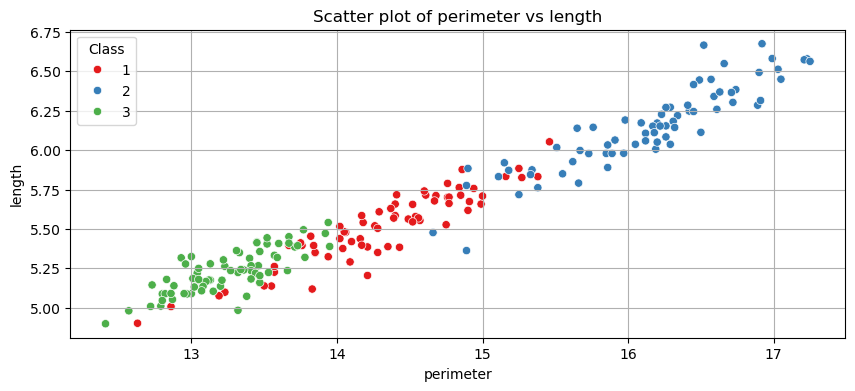

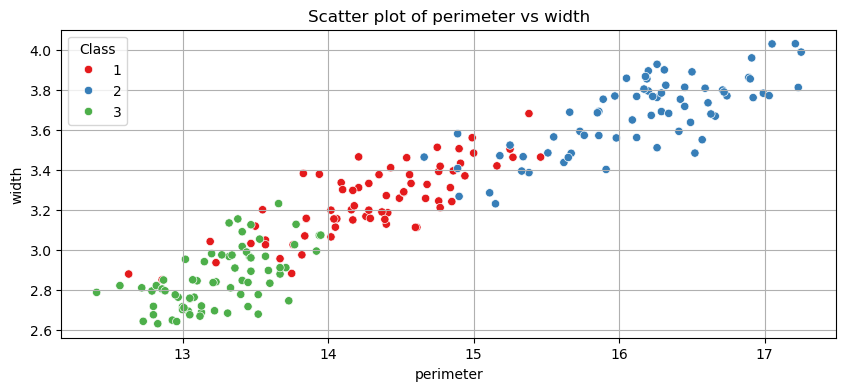

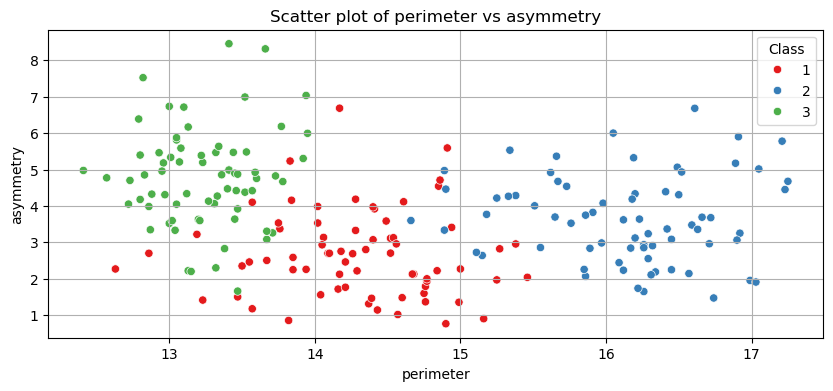

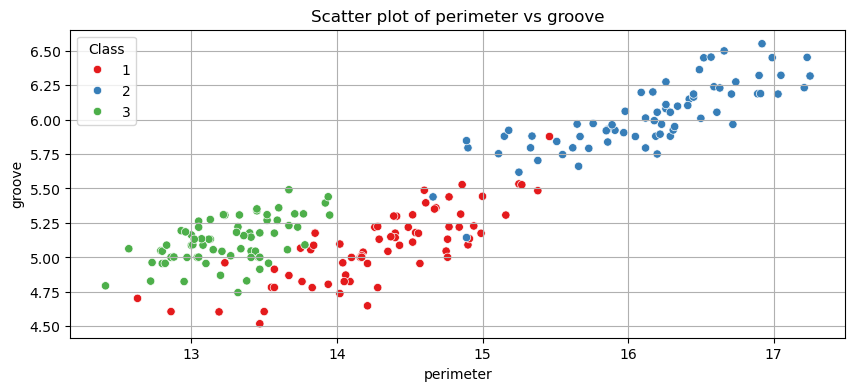

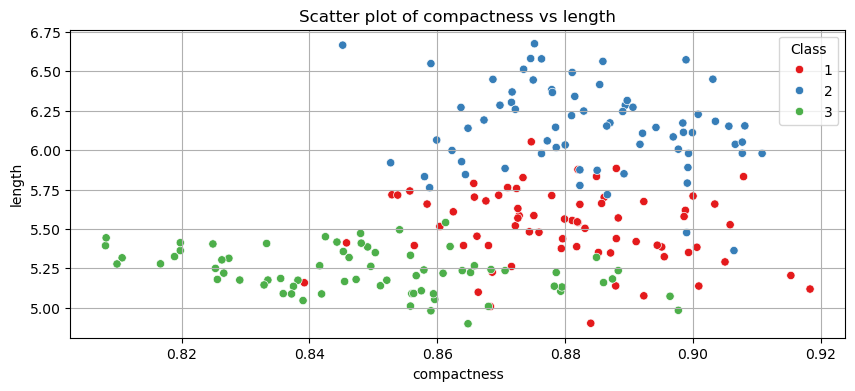

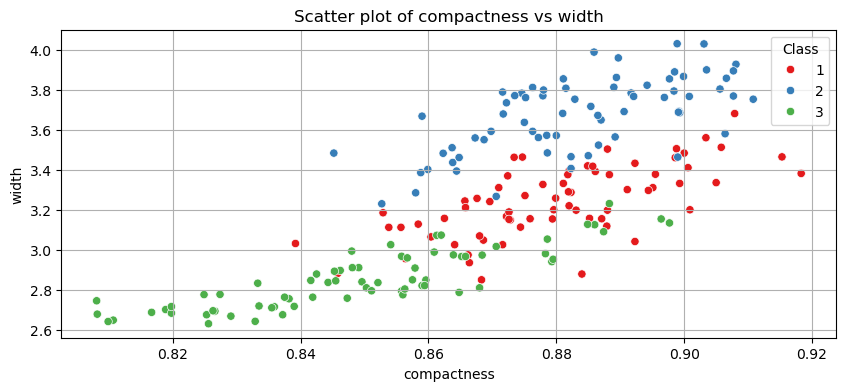

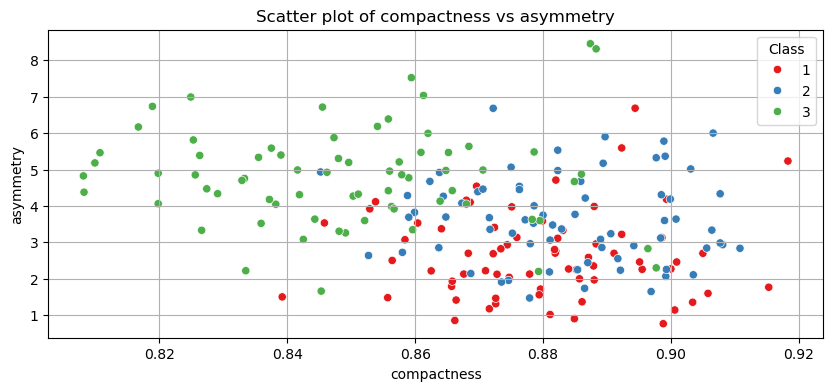

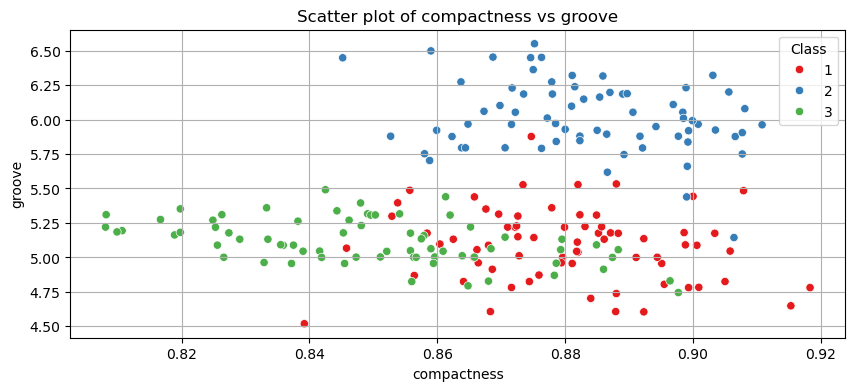

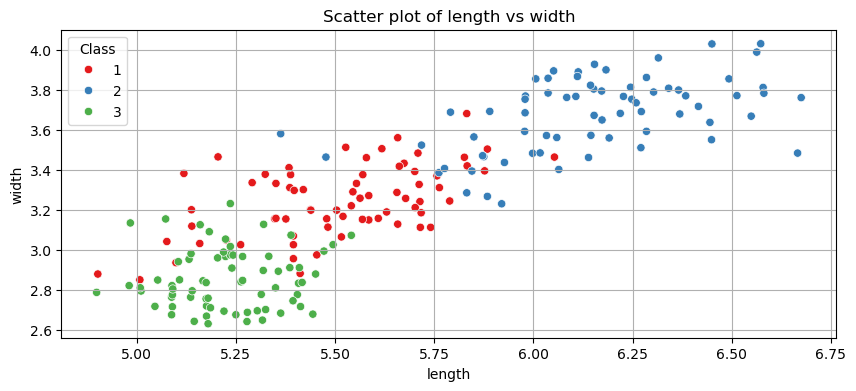

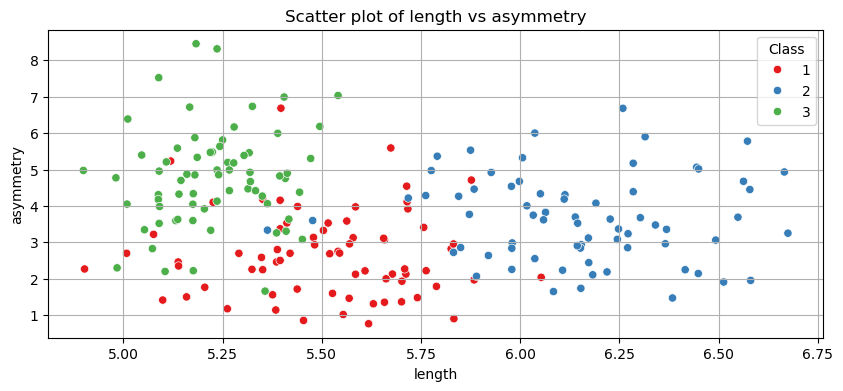

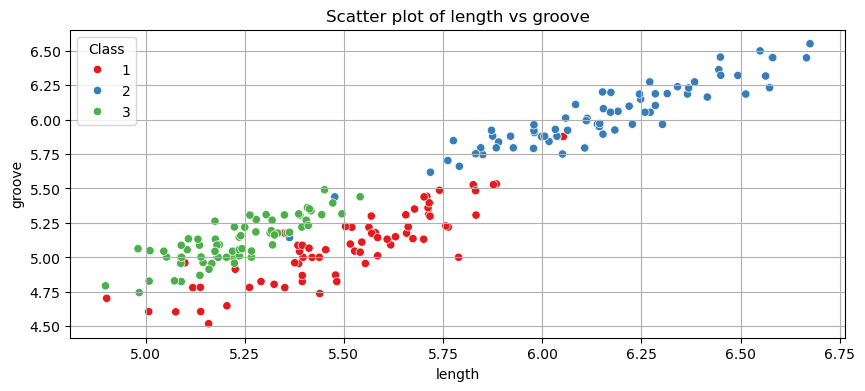

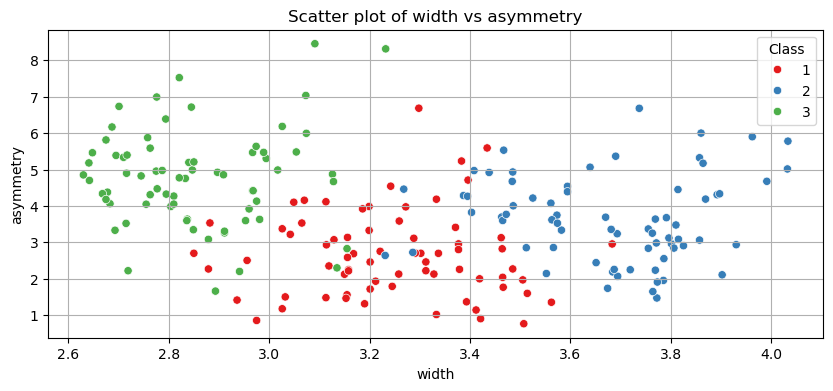

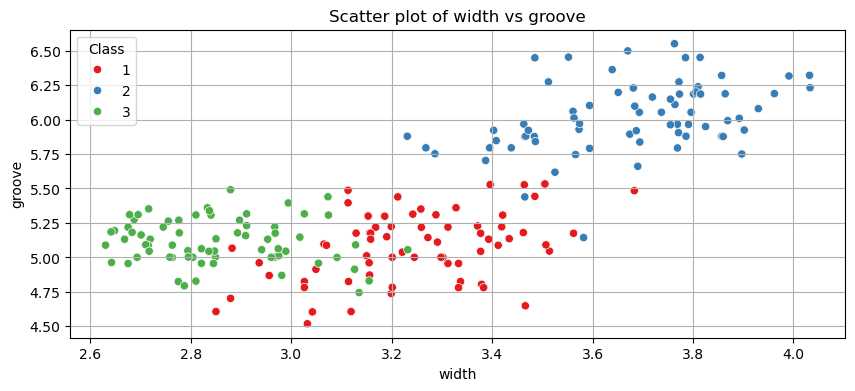

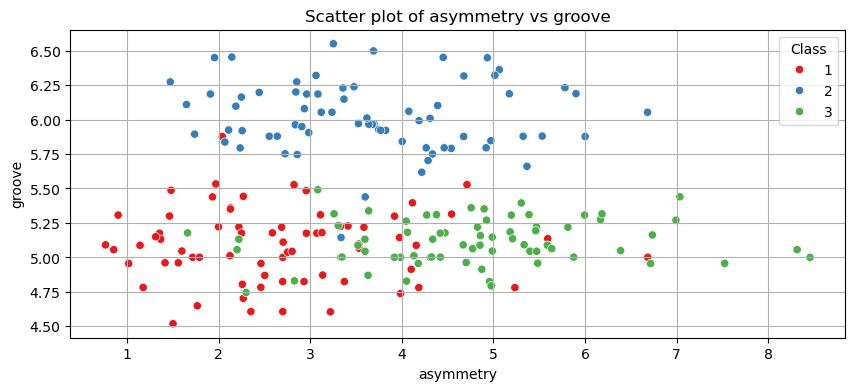

In [ ]:
for i in range(len(cols)-1):
    for j in range(i+1,len(cols)-1):
        plt.figure(figsize=(10, 4))
        x_label= cols[i]
        y_label= cols[j]
        sns.scatterplot(data=df, x=x_label, y=y_label, hue='class', palette='Set1')
        plt.title(f'Scatter plot of {x_label} vs {y_label}')
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend(title='Class')
        plt.grid(True)
        plt.show()


### Clustering

In [36]:
feature_x= 'compactness'
feature_y= 'asymmetry' 
X= df[[feature_x, feature_y]].values # a list of features 

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

d:\Programing\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [39]:
clusters = kmeans.labels_
clusters_df = pd.DataFrame(X, columns=[feature_x, feature_y])

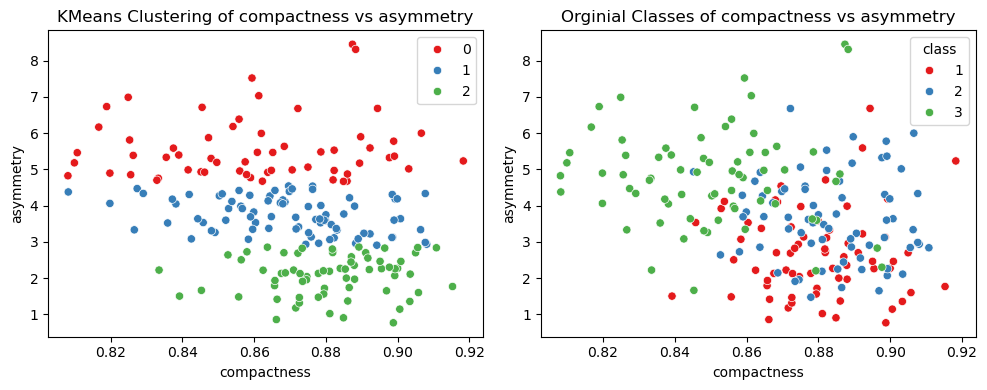

In [40]:
# compare clusters with original classes for 2 features

fig, ax = plt.subplots(1,2, figsize=(10, 4))
sns.scatterplot(data= clusters_df, x= feature_x, y= feature_y, hue=clusters, palette='Set1', ax=ax[0])
sns.scatterplot(data= df, x= feature_x, y= feature_y, hue='class', palette='Set1', ax=ax[1])

ax[0].set_title(f'KMeans Clustering of {feature_x} vs {feature_y}')
ax[1].set_title(f'Orginial Classes of {feature_x} vs {feature_y}')

plt.tight_layout()
plt.show()


we can see here that k means with just fitting two features is not accurate enough to cluster such complixity. 
so maybe fitting all the features will help

### Clusters with higher dimensions

In [5]:
X= df[cols[:-1]].values

In [42]:
kmeans_all = KMeans(n_clusters=3, random_state=42).fit(X)
clusters_all = kmeans_all.labels_
clusters_all_df = pd.DataFrame(X, columns=cols[:-1])

d:\Programing\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


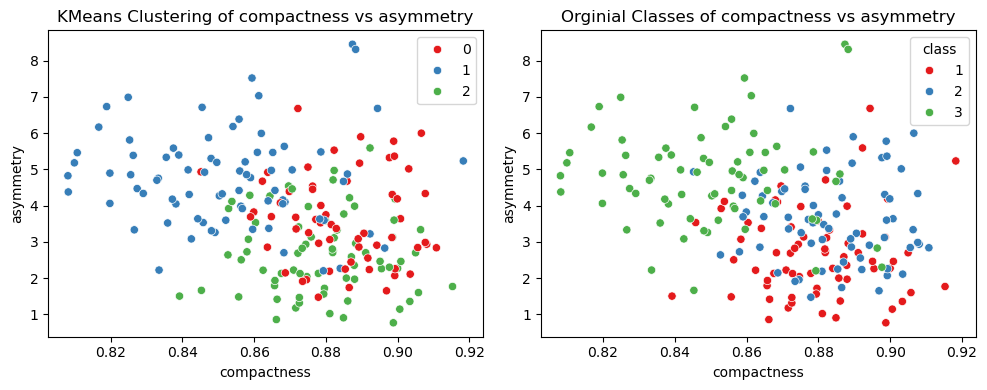

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))
sns.scatterplot(data= clusters_all_df, x= feature_x, y= feature_y, hue=clusters_all, palette='Set1', ax=ax[0])
sns.scatterplot(data= df, x= feature_x, y= feature_y, hue='class', palette='Set1', ax=ax[1])

ax[0].set_title(f'KMeans Clustering of {feature_x} vs {feature_y}')
ax[1].set_title(f'Orginial Classes of {feature_x} vs {feature_y}')

plt.tight_layout()
plt.show()


we can see after fitting all the dimensions the model is better at clustering as the each cluster roughly correspond with each class.
- `red(0) -> blue(2)`
- `blue(1) -> green(3)`
- `green(2) -> red(1)`

### PCA

In [1]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2)
transformed_x= pca.fit_transform(X)

In [11]:
X.shape, transformed_x.shape

((210, 7), (210, 2))

now the features are 2 components

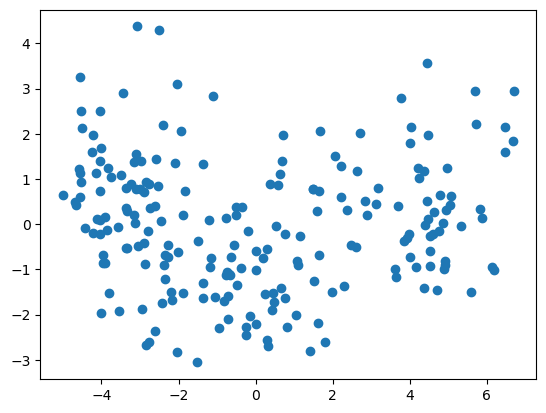

In [19]:
plt.scatter(transformed_x[:,0], transformed_x[:,1])

now I want to cluster the pca 

In [21]:
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(transformed_x)

d:\Programing\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [27]:
clusters_pca = kmeans_pca.labels_

In [34]:
clusters_pca_df = pd.DataFrame(np.hstack((transformed_x, clusters_pca.reshape(-1,1))), columns=['PC1', 'PC2', 'clusters'])

In [39]:
correct_pca_df = pd.DataFrame(np.hstack((transformed_x, df['class'].values.reshape(-1,1))), columns=['PC1', 'PC2', 'class'])

In [36]:
clusters_pca_df.head()

,PC1,PC2,clusters
0,0.663448,-1.417321,1.0
1,0.315667,-2.689229,1.0
2,-0.660499,-1.131506,1.0
3,-1.055276,-1.621190,1.0
4,1.619999,-2.183384,1.0


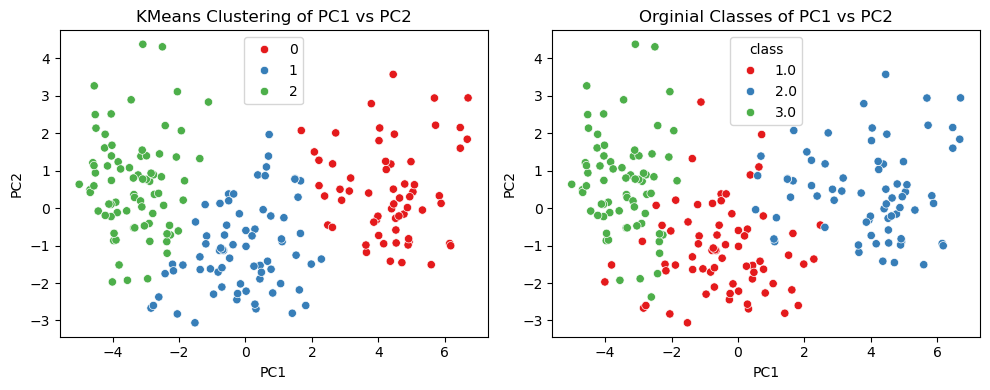

In [40]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))
sns.scatterplot(data= clusters_pca_df, x= 'PC1', y= 'PC2', hue=clusters_pca, palette='Set1', ax=ax[0])
sns.scatterplot(data= correct_pca_df, x= 'PC1', y= 'PC2', hue='class', palette='Set1', ax=ax[1])

ax[0].set_title(f'KMeans Clustering of {'PC1'} vs {'PC2'}')
ax[1].set_title(f'Orginial Classes of {'PC1'} vs {'PC2'}')

plt.tight_layout()
plt.show()

This shows the clustering on the pca model.